In [1]:
from tensorflow import keras
import tensorflow as tf
from postprocessor import PostProcessor

In [2]:
modelpath = '/home/Data/Models/seg_model.h5'
unet_model = keras.models.load_model(modelpath, compile=False)

layer = PostProcessor()(unet_model.output)
#layer = keras.layers.Lambda(lambda x: tf.math.argmax(x,axis=3)*255, name='foreground_extractor')(unet_model.output) 

model = keras.Model(inputs=[unet_model.input], outputs=layer, name='coolio')

In [3]:
model.summary()

______________
stage3_unit4_bn2 (BatchNormaliz (None, None, None, 2 1024        stage3_unit4_conv1[0][0]         
__________________________________________________________________________________________________
stage3_unit4_relu2 (Activation) (None, None, None, 2 0           stage3_unit4_bn2[0][0]           
__________________________________________________________________________________________________
zero_padding2d_23 (ZeroPadding2 (None, None, None, 2 0           stage3_unit4_relu2[0][0]         
__________________________________________________________________________________________________
stage3_unit4_conv2 (Conv2D)     (None, None, None, 2 589824      zero_padding2d_23[0][0]          
__________________________________________________________________________________________________
add_10 (Add)                    (None, None, None, 2 0           stage3_unit4_conv2[0][0]         
                                                                 add_9[0][0]                  

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
p = '/home/Data/field-raw-images/7b11f2bd-b839-d3d3-c169-cda202a58041.jpg'
image = cv.resize(cv.imread(p, cv.IMREAD_COLOR),(512,512))
print(image.shape)
o = model.predict(image[np.newaxis, ...])
print(o.shape)


(512, 512, 3)
(1, 512, 512)


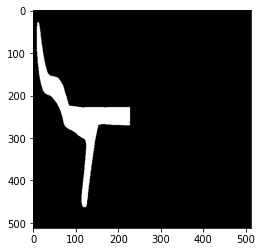

In [6]:
plt.imshow(o[0], cmap='gray')

In [7]:
np.max(o[0])

255

(array([246375.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

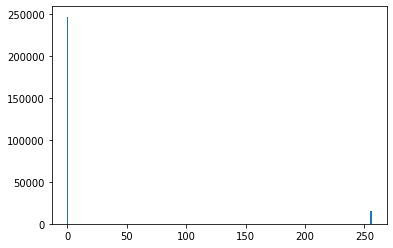

In [8]:
plt.hist(o[0].ravel(),256,[0,256])

In [9]:
#plt.bar(hist)